<a href="https://colab.research.google.com/github/SijieQiu/RQ/blob/main/127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BERtopic**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving 127.docx to 127.docx


In [3]:
import json
!pip install python-docx
from docx import Document

file_name = '127.docx'

doc = Document(file_name)

data = []

for para in doc.paragraphs:
    if para.text.strip():
        parts = para.text.split('\t')
        if len(parts) >= 2:
            content = parts[0].strip()
            labels = [label.strip() for label in parts[1].split(',')]
            data.append({
                "content": content,
                "labels": labels
            })
print(f"Number of documents: {len(data)}")
print(f"Sample document: {data[0]}")

json_file_name = '127.json'
with open(json_file_name, 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

print(f"JSON file '{json_file_name}' created successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.0 MB/s eta 0:00:00
Number of documents: 27
Sample document: {'content': 'Joe Potter and Matthew Trent work at a small, remote outpost in the middle of a snowy wilderness. Joe wakes up on Christmas Day to find Matt preparing Christmas dinner, with "I Wish It Could Be Christmas Everyday" playing on the radio. Matt tries to get Joe to talk about why he accepted the job at the outpost, a topic they have never discussed in the five years they have worked together. Joe is reluctant to say anything and instead asks why Matt took the job. Happy with the conversation, Matt begins his story. The story is set in a world where people can access the Internet through an augmented reality device implanted in their eyes called the "Z-Eye". Matt was once a dating coach who taught seduction techniques to single men who struggle to attract women. He directs one of his clients, the shy and socially awkward Harry, into gatecrashing an office Ch

In [4]:
import json
from sklearn.feature_extraction.text import CountVectorizer

# 读取JSON文件
file_name = '127.json'

with open(file_name, 'r') as input_file:
    data = json.load(input_file)

# 提取文档和标签
docs = [item['content'] for item in data]
labels = [item['labels'] for item in data]

# 打印文档和标签的数量，以及一个示例文档和它的标签
print(f"Number of documents: {len(docs)}")
print(f"Number of labels: {len(labels)}")
print(f"Sample document: {docs[0]}")
print(f"Sample label: {labels[0]}")

# 使用CountVectorizer将文本转换为向量
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

print(f"Feature shape: {X.shape}")

Number of documents: 27
Number of labels: 27
Sample document: Joe Potter and Matthew Trent work at a small, remote outpost in the middle of a snowy wilderness. Joe wakes up on Christmas Day to find Matt preparing Christmas dinner, with "I Wish It Could Be Christmas Everyday" playing on the radio. Matt tries to get Joe to talk about why he accepted the job at the outpost, a topic they have never discussed in the five years they have worked together. Joe is reluctant to say anything and instead asks why Matt took the job. Happy with the conversation, Matt begins his story. The story is set in a world where people can access the Internet through an augmented reality device implanted in their eyes called the "Z-Eye". Matt was once a dating coach who taught seduction techniques to single men who struggle to attract women. He directs one of his clients, the shy and socially awkward Harry, into gatecrashing an office Christmas party, and communicates with him through the Z-Eye. They are then 

In [6]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB

In [15]:
import json
from bertopic import BERTopic
from bertopic.backend import BaseEmbedder
from bertopic.cluster import BaseCluster
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction

# Load the JSON file
with open('127.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract documents and labels
docs = [item['content'] for item in data]
y_labels = [item['labels'][0] for item in data]  # Assuming each doc has at least one label and taking the first label

# Create a mapping from labels to integers
label_mapping = {label: i for i, label in enumerate(set(y_labels))}

# Convert labels to integers
y = [label_mapping[label] for label in y_labels]

# Prepare our empty sub-models and reduce frequent words while we are at it.
empty_embedding_model = BaseEmbedder()
empty_dimensionality_model = BaseDimensionalityReduction()
empty_cluster_model = BaseCluster()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Fit BERTopic without actually performing any clustering
topic_model = BERTopic(
    embedding_model=empty_embedding_model,
    umap_model=empty_dimensionality_model,
    hdbscan_model=empty_cluster_model,
    ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y) # Pass the integer labels to fit_transform


In [21]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,3,0_rolo_carrie_nish_joe,"[rolo, carrie, nish, joe, clayton, dawson, mat...",[Captain Robert Daly (Jesse Plemons) and his c...
1,1,3,1_kelly_yorkie_stripe_junipero,"[kelly, yorkie, stripe, junipero, san, cooper,...","[Cooper (Wyatt Russell), a man living with his..."
2,2,2,2_callow_susannah_public_demand,"[callow, susannah, public, demand, broadcast, ...",[Kenny gets a call from his mother. His face i...
3,3,1,3_amy_frank_coach_lenny,"[amy, frank, coach, lenny, match, nicola, syst...",[The coach directs Frank to the hub. He walks ...
4,4,1,4_bo_mazey_hector_whitty,"[bo, mazey, hector, whitty, duke, pictures, cl...",[Bo sits in a motel parking lot listening to a...
5,5,1,5_david_cliff_lana_henry,"[david, cliff, lana, henry, station, jessica, ...",[As David Ross is drawing a portrait of his tw...
6,6,1,6_pia_davis_janet_stuart,"[pia, davis, janet, stuart, kenneth, iain, ric...",[Pia Koresh sleeps on Davis McCardle's shoulde...
7,7,1,7_joan_salma_krish_mac,"[joan, salma, krish, mac, tv, sandy, eric, hay...",[Joan Tait wakes up to her phone alarm. She tu...
8,8,1,8_ashley_rachel_catherine_too,"[ashley, rachel, catherine, too, jack, kevin, ...","[In a busy school cafeteria, Rachel Goggins si..."
9,9,1,9_chris_jaden_billy_smithereen,"[chris, jaden, billy, smithereen, penelope, me...","[In 2018, Chris (Andrew Scott) is a rideshare ..."


from matplotlib import pyplot as plt
_df_0['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Topic', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Topic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Topic'}, axis=1)
              .sort_values('Topic', ascending=True))
  xs = counted['Topic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Topic'].plot(kind='line', figsize=(8, 4), title='Topic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
# Map input `y` to topics
mappings = topic_model.topic_mapper_.get_mappings()

# Assuming 'data' should have a dictionary called 'target_names'
# If 'target_names' is actually a list, you'll need to adjust how you map the values
if "target_names" in data and isinstance(data["target_names"], dict):
    mappings = {value: data["target_names"][key] for key, value in mappings.items()}
else:
    print("Warning: 'data' does not contain a 'target_names' dictionary.")
    mappings = {value: key for key, value in mappings.items()}  # Use the original label if no mapping is available

# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Representation,Representative_Docs,Class
0,0,3,0_rolo_carrie_nish_joe,"[rolo, carrie, nish, joe, clayton, dawson, mat...",[Captain Robert Daly (Jesse Plemons) and his c...,11
1,1,3,1_kelly_yorkie_stripe_junipero,"[kelly, yorkie, stripe, junipero, san, cooper,...","[Cooper (Wyatt Russell), a man living with his...",1
2,2,2,2_callow_susannah_public_demand,"[callow, susannah, public, demand, broadcast, ...",[Kenny gets a call from his mother. His face i...,8
3,3,1,3_amy_frank_coach_lenny,"[amy, frank, coach, lenny, match, nicola, syst...",[The coach directs Frank to the hub. He walks ...,10
4,4,1,4_bo_mazey_hector_whitty,"[bo, mazey, hector, whitty, duke, pictures, cl...",[Bo sits in a motel parking lot listening to a...,9
5,5,1,5_david_cliff_lana_henry,"[david, cliff, lana, henry, station, jessica, ...",[As David Ross is drawing a portrait of his tw...,17
6,6,1,6_pia_davis_janet_stuart,"[pia, davis, janet, stuart, kenneth, iain, ric...",[Pia Koresh sleeps on Davis McCardle's shoulde...,14
7,7,1,7_joan_salma_krish_mac,"[joan, salma, krish, mac, tv, sandy, eric, hay...",[Joan Tait wakes up to her phone alarm. She tu...,21
8,8,1,8_ashley_rachel_catherine_too,"[ashley, rachel, catherine, too, jack, kevin, ...","[In a busy school cafeteria, Rachel Goggins si...",20
9,9,1,9_chris_jaden_billy_smithereen,"[chris, jaden, billy, smithereen, penelope, me...","[In 2018, Chris (Andrew Scott) is a rideshare ...",7


from matplotlib import pyplot as plt
df['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Class'].plot(kind='hist', bins=20, title='Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Topic', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Count', y='Class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Class']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Class')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Topic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Topic'}, axis=1)
              .sort_values('Topic', ascending=True))
  xs = counted['Topic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Topic'].plot(kind='line', figsize=(8, 4), title='Topic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Class'].plot(kind='line', figsize=(8, 4), title='Class')
plt.gca().spines[['top', 'right']].set_visible(False)

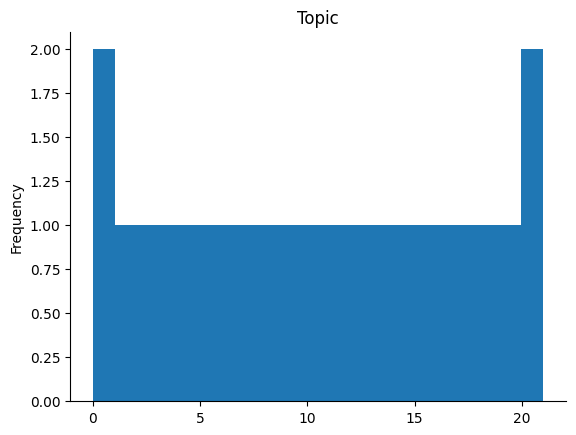

In [20]:
from matplotlib import pyplot as plt
df['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Hierarchical LDA**

In [24]:
!pip install tomotopy
import json
from tomotopy import HLDAModel

file_name = '127.json'

with open(file_name, 'r', encoding='utf-8') as file:
    data = json.load(file)

documents = [item['content'].strip().split() for item in data]

mdl = HLDAModel(depth=3, min_cf=100)

for document in documents:
    mdl.add_doc(document)

print('Training model by iterating over the corpus 100 times, 10 iterations at a time')
iterations = 10
for i in range(0, 100, iterations):
    mdl.train(iterations)
    print('Iteration: #{}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    if not mdl.is_live_topic(k):
        continue
    print('child of topic #{} - Level: {}, number of documents {}'.format(mdl.parent_topic(k), mdl.level(k), mdl.num_docs_of_topic(k)))
    print('Top 10 words of global topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))


Training model by iterating over the corpus 100 times, 10 iterations at a time
Iteration: #0	Log-likelihood: -4.401551966551277
Iteration: #10	Log-likelihood: -4.215755193812295
Iteration: #20	Log-likelihood: -4.175531532716104
Iteration: #30	Log-likelihood: -4.12475651045972
Iteration: #40	Log-likelihood: -4.0650890551375305
Iteration: #50	Log-likelihood: -4.012699258700677
Iteration: #60	Log-likelihood: -4.000053651133392
Iteration: #70	Log-likelihood: -3.951857814869976
Iteration: #80	Log-likelihood: -3.9397838804216923
Iteration: #90	Log-likelihood: -3.9149259240956753
child of topic #-1 - Level: 0, number of documents 27
Top 10 words of global topic #0
[('the', 0.10857900977134705), ('to', 0.09607960283756256), ('and', 0.08949658274650574), ('a', 0.052331678569316864), ('her', 0.04416540265083313), ('she', 0.041998837143182755), ('in', 0.030499383807182312), ('that', 0.029249444603919983), ('of', 0.026582904160022736), ('is', 0.02408302202820778)]
child of topic #0 - Level: 1, num

In [33]:
parent_topics = [k for k in range(mdl.k) if mdl.children_topics(k).any() and mdl.num_docs_of_topic(k) > 100] # Use .any() to check if there are any child topics
for parent_topic in parent_topics:
    child_topics = [child_topic for child_topic in mdl.children_topics(parent_topic) if mdl.num_docs_of_topic(child_topic) > 100]
    if child_topics:
        print('\n\n')
    print('Top 10 words of level %s parent topic #%s of %s documents: %r' % (mdl.level(parent_topic), parent_topic, mdl.num_docs_of_topic(parent_topic), mdl.get_topic_words(parent_topic, top_n=10)))

    for child_topic in child_topics:
        print('    Top 10 words of child topic #%s: %r' % (child_topic, mdl.get_topic_words(child_topic, top_n=10)))

**Hierarchical topic modelling with PAM**

In [34]:
import json
import tomotopy as tp

# 定义文件名
file_name = '127.json'

# 加载 JSON 文件
with open(file_name, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取文档内容
documents = [item['content'].strip().split() for item in data]

# 初始化模型
mdl = tp.HPAModel(k1=5, k2=100, min_cf=100, rm_top=200)

# 添加文档到模型中
for document in documents:
    mdl.add_doc(document)

print('Starting training model')
iterations = 10
for i in range(0, 100, iterations):
    mdl.train(iterations)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

root_index = 0
words = mdl.get_topic_words(root_index, top_n=30)
print('Root Topic #%s' % root_index)
print('Top 10 words of Root Topic #%s: %r' % (root_index, words))

for k in range(1, 1 + mdl.k1):
    words = mdl.get_topic_words(k, top_n=30)
    print('\n\nLevel 1 Topic #%s' % k)
    print('    Top 10 words of Level 1 Topic #%s: %r' % (k, words))

for k in range(1 + mdl.k1, 1 + mdl.k1 + mdl.k2):
    words = mdl.get_topic_words(k, top_n=30)
    print('\n\nLevel 2 Topic #%s' % (k - mdl.k1))
    print('    Top 10 words of Level 2 Topic #%s: %r' % (k - mdl.k1, words))


Starting training model
Iteration: 0	Log-likelihood: nan
Iteration: 10	Log-likelihood: nan
Iteration: 20	Log-likelihood: nan
Iteration: 30	Log-likelihood: nan
Iteration: 40	Log-likelihood: nan
Iteration: 50	Log-likelihood: nan
Iteration: 60	Log-likelihood: nan
Iteration: 70	Log-likelihood: nan
Iteration: 80	Log-likelihood: nan
Iteration: 90	Log-likelihood: nan
Root Topic #0
Top 10 words of Root Topic #0: []


Level 1 Topic #1
    Top 10 words of Level 1 Topic #1: []


Level 1 Topic #2
    Top 10 words of Level 1 Topic #2: []


Level 1 Topic #3
    Top 10 words of Level 1 Topic #3: []


Level 1 Topic #4
    Top 10 words of Level 1 Topic #4: []


Level 1 Topic #5
    Top 10 words of Level 1 Topic #5: []


Level 2 Topic #1
    Top 10 words of Level 2 Topic #1: []


Level 2 Topic #2
    Top 10 words of Level 2 Topic #2: []


Level 2 Topic #3
    Top 10 words of Level 2 Topic #3: []


Level 2 Topic #4
    Top 10 words of Level 2 Topic #4: []


Level 2 Topic #5
    Top 10 words of Level 2 To

**LDA**

In [35]:
!pip install little_mallet_wrapper

In [36]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

In [47]:
import tomotopy as tp
import json

# 读取JSON文件
file_name = '127.json'
with open(file_name, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 提取文档
training_data = [item['content'] for item in data] # Extract content from each item in the list

# 主题数量
num_topics = 226
# 每个主题的词语数量
num_topic_words = 15

# 初始化模型
model = tp.LDAModel(k=num_topics)

# 添加每个文档到模型中
for text in training_data:
    model.add_doc(text.strip().split()) # Indent this line to include it in the loop

print("Topic:")

Topic:
